In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [84]:
# Read the CSV file into a DataFrame
data = pd.read_csv('Flight_price_prediction.csv')

In [85]:
data.head(10)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954


In [86]:
data.drop(columns=['Unnamed: 0', 'flight'], inplace=True)
data.dropna(subset=['price'], inplace=True)

In [87]:
data.dropna(inplace=True)

In [88]:
print(data.isnull().sum())

airline             0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64


In [89]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
categorical_cols = ['airline', 'source_city', 'departure_time', 'stops', 
                    'arrival_time', 'destination_city', 'class']

for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])

In [90]:
X = data.drop('price', axis=1)  # Features
y = data['price']               # Target

In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=100
)

In [92]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Convert DataFrame to numpy array before scaling
X_train = scaler.fit_transform(X_train.values)
X_test = scaler.transform(X_test.values)

In [93]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [94]:
joblib.dump(regression, 'flight_price_model.pkl', protocol=4)
joblib.dump(scaler, 'flight_price_scaler.pkl', protocol=4)
joblib.dump(encoder, 'flight_price_encoder.pkl', protocol=4)

['flight_price_encoder.pkl']

In [95]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = regression.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Squared Error (MSE): 49177483.96
Mean Absolute Error (MAE): 4641.46
R² Score: 0.90
Root Mean Squared Error (RMSE): 7012.67


In [96]:
import joblib
model = joblib.load('flight_price_model.pkl')
print(model.n_features_in_)  # Prints how many features the model expects


9


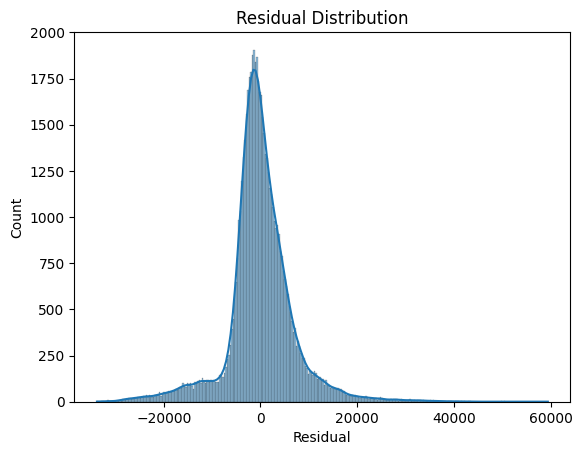

In [97]:
import seaborn as sns
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title('Residual Distribution')
plt.xlabel('Residual')
plt.show()